In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import pickle 
import numpy as np 
  
from sklearn.model_selection import train_test_split 
import sklearn.metrics as metrics 


In [3]:
import seaborn as sns

In [5]:
data2 = pd.read_csv('../Datasets/Cropdata.csv')

In [6]:
data3 = pd.read_csv('../Datasets/populate_data.csv')

In [13]:
data = data2.drop('Family' , axis = 'columns')

In [ ]:
labels = daata['']

In [15]:


# Assuming 'df' is your DataFrame and 'class_labels_column' is the column containing class labels
# Step 1: Load your data
# df = pd.read_csv('your_dataset.csv')

# Step 2: Identify unique classes
labels= data['label'].unique()

# Step 3: Create new columns
for l in labels:
    data[l]= 0

# Step 4: Populate new columns
for index, row in data.iterrows():
    class_label = row['label']
    data.at[index, class_label] = 1

# Now, df contains one-hot encoded columns for your class labels


In [17]:
def semulate_yield(value):
    if value ==0:
        return np.random.uniform(0,0.5 ) if np.random.rand() <0.8 else np.random.uniform(0.5,1)
    else :
      return value

In [18]:
for column in labels:
    data[column]= data[column].apply(semulate_yield)

In [26]:
data

,N,P,K,temperature,humidity,ph,rainfall,label,rice,maize,...,Walnuts,Betel nuts,Saffron,Black pepper,Vanilla,Cocoa (for chocolate),Tobacco,Opium poppy (for pharmaceuticals),Rubber,Silk (from silkworms)
0,90.000000,42.000000,43.000000,20.879744,82.002744,6.502985,202.935536,rice,1.000000,0.106029,...,0.452707,0.126567,0.412758,0.262675,0.080935,0.498297,0.142794,0.075110,0.430111,0.917147
1,85.000000,58.000000,41.000000,21.770462,80.319644,7.038096,226.655537,rice,1.000000,0.284691,...,0.056735,0.165293,0.027718,0.648363,0.134164,0.127141,0.930630,0.430110,0.355865,0.119524
2,60.000000,55.000000,44.000000,23.004459,82.320763,7.840207,263.964248,rice,1.000000,0.877157,...,0.287280,0.427139,0.363119,0.126474,0.569538,0.274738,0.038004,0.084051,0.384505,0.159154
3,74.000000,35.000000,40.000000,26.491096,80.158363,6.980401,242.864034,rice,1.000000,0.278403,...,0.612624,0.008530,0.099357,0.588012,0.867414,0.390001,0.917073,0.571185,0.351345,0.434528
4,78.000000,42.000000,42.000000,20.130175,81.604873,7.628473,262.717340,rice,1.000000,0.204351,...,0.175650,0.629014,0.058213,0.688707,0.330538,0.368506,0.603737,0.981419,0.418924,0.950533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8595,61.805859,47.672594,97.414930,24.850300,123.487088,6.036764,196.676977,Silk (from silkworms),0.258194,0.207550,...,0.320048,0.407187,0.037841,0.356439,0.237332,0.672686,0.439308,0.021744,0.483785,1.000000
8596,22.844938,80.668085,107.294228,24.955801,79.604883,4.774558,217.397726,Silk (from silkworms),0.058511,0.975473,...,0.315162,0.174628,0.338705,0.442250,0.530291,0.185643,0.047689,0.483521,0.340457,1.000000
8597,43.175013,51.194571,27.759517,21.188037,47.946527,4.760295,52.777676,Silk (from silkworms),0.433730,0.494876,...,0.387646,0.360224,0.064585,0.480648,0.269352,0.218370,0.078436,0.528401,0.168225,1.000000
8598,31.754884,-18.441935,104.397553,33.770748,45.797009,6.992872,112.977350,Silk (from silkworms),0.359752,0.689642,...,0.747070,0.192524,0.452421,0.082485,0.438447,0.386164,0.340746,0.772208,0.097665,1.000000


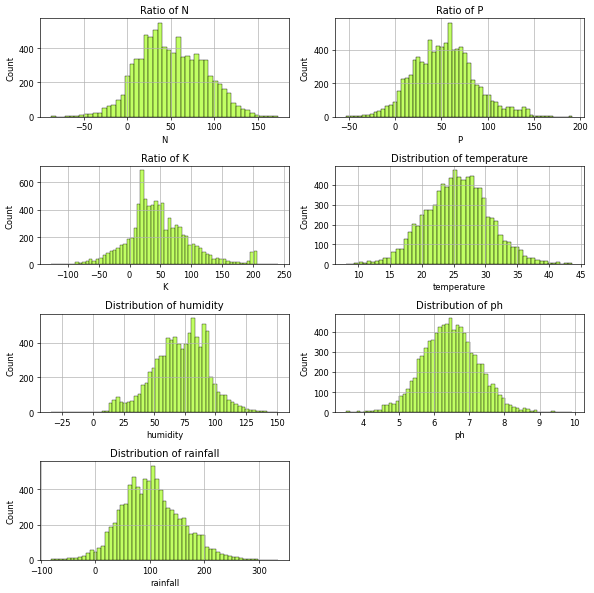

In [11]:
plt.rcParams['figure.figsize'] = (10, 10) 
plt.rcParams['figure.dpi'] = 60
  
features = ['N', 'P', 'K', 'temperature', 
            'humidity', 'ph', 'rainfall'] 
  
for i, feat in enumerate(features): 
    plt.subplot(4, 2, i + 1) 
    sns.histplot(data2[feat], color='greenyellow') 
    if i < 3: 
        plt.title(f'Ratio of {feat}', fontsize=12) 
    else: 
        plt.title(f'Distribution of {feat}', fontsize=12) 
    plt.tight_layout() 
    plt.grid() 

In [22]:
data_ = data2.drop('Family', axis='columns')

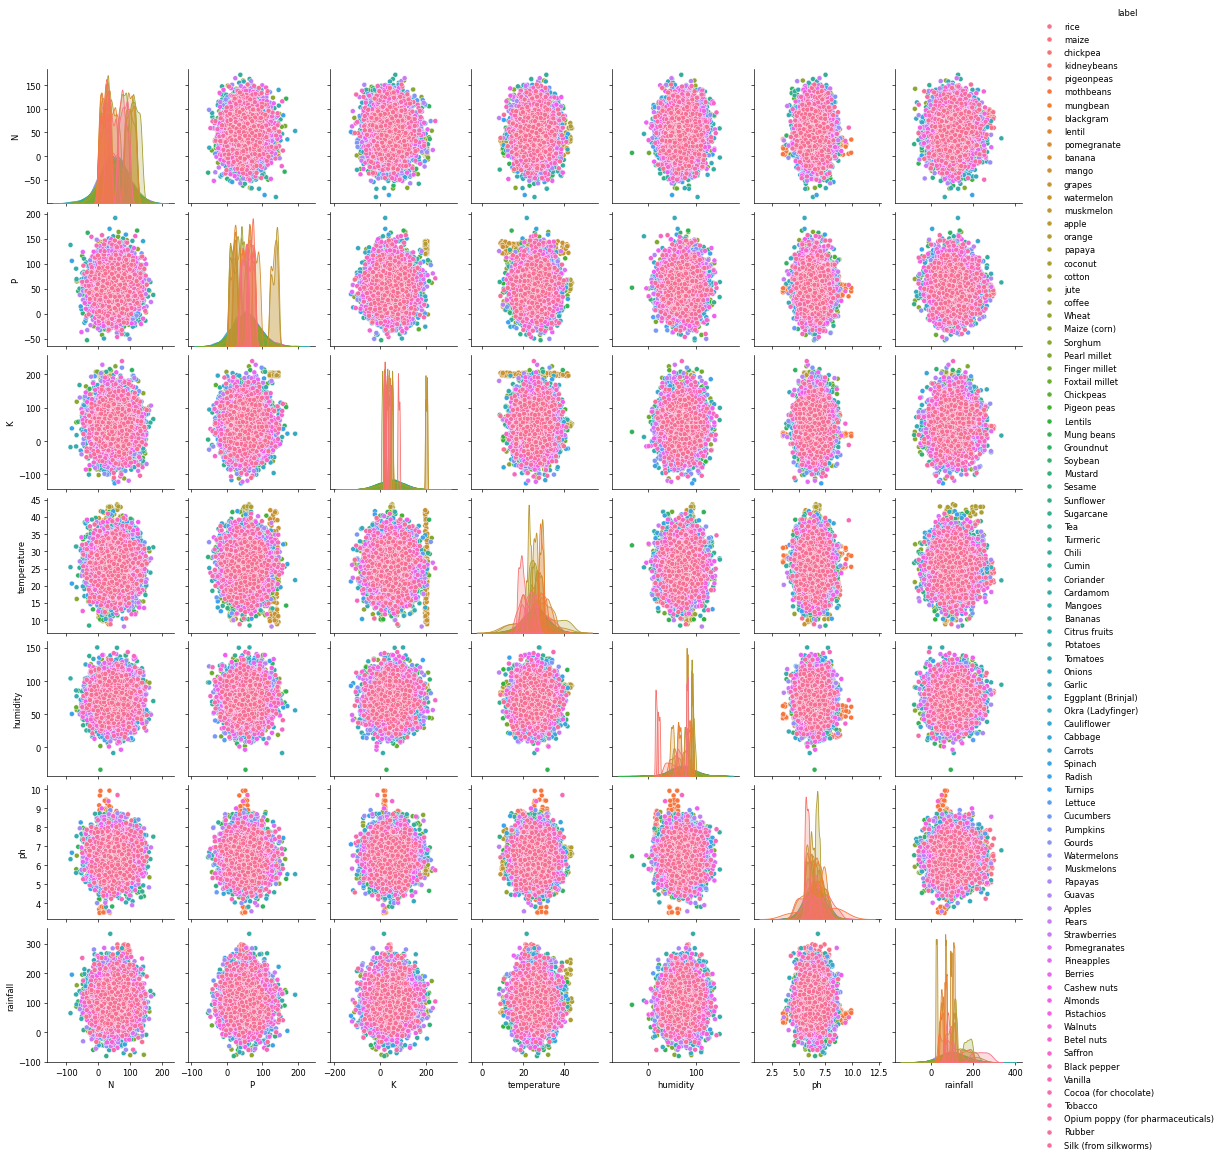

In [24]:
sns.pairplot(data_, hue='label') 

In [85]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of your DataFrame to work with
data_encoded = data_.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in your DataFrame
for column in data_encoded.columns:
    # Check if the column contains non-numeric data
    if data_encoded[column].dtype == 'object':
        # Encode the labels into numeric values
        data_encoded[column] = label_encoder.fit_transform(data_encoded[column])


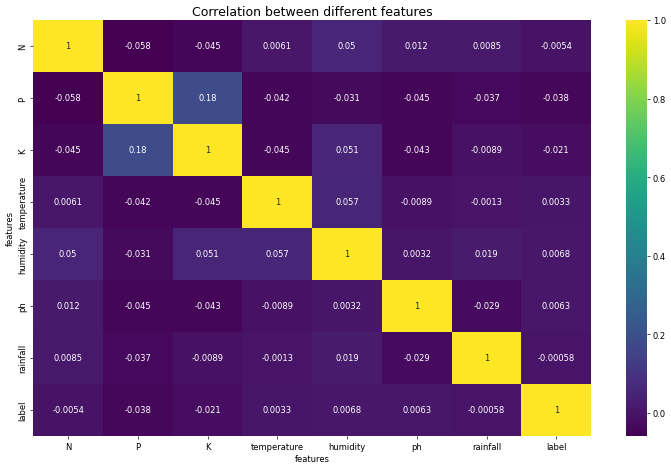

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9)) 
sns.heatmap(data_encoded.corr(), 
            annot=True, 
            cmap='viridis') 
ax.set(xlabel='features') 
ax.set(ylabel='features') 
  
plt.title('Correlation between different features', 
          fontsize=15, 
          c='black') 
plt.show() 


In [116]:


features = data_encoded[['N', 'P', 'K', 'temperature', 
                 'humidity', 'ph', 'rainfall']] 
labels = data_encoded['label']

In [56]:
data_encoded['crops'] = data_['label']


In [64]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [107]:
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels
    
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        feature = torch.tensor(self.features.iloc[idx].values, dtype=torch.float32)
        label = torch.tensor(self.labels.iloc[idx], dtype=torch.long)
        
        return feature, label



In [117]:
X_train, X_test,Y_train,Y_test = train_test_split(features, labels, test_size=0.2,random_state=42) 

In [118]:
dataset = CustomDataset(X_train, Y_train)

In [197]:


class SimpleClassifier(nn.Module):
    def __init__(self, input_size,  output_size):
        super(SimpleClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Sequential(nn.Linear(10,15),nn.ReLU())
        self.fc3 = nn.Sequential(nn.Linear(15,25),nn.ReLU())
        self.fc4 = nn.Sequential(nn.Linear(25,40),nn.ReLU())
        self.fc5 = nn.Sequential(nn.Linear(40,55),nn.ReLU())
        self.fc6 = nn.Sequential(nn.Linear(55,70),nn.ReLU())
        self.fc7 = nn.Sequential(nn.Linear(70,85),nn.ReLU())
        self.fc8 = nn.Sequential(nn.Linear(85,100),nn.ReLU())
        self.fc9 = nn.Sequential(nn.Linear(100,100),nn.ReLU())
        self.fc10 = nn.Sequential(nn.Linear(100,100),nn.ReLU())
        self.fc11 = nn.Sequential(nn.Linear(100,100),nn.ReLU())
        self.fc12 = nn.Sequential(nn.Dropout(0.4),nn.Linear(100,100),nn.ReLU())
        
        self.fc13 = nn.Linear(100, output_size)
    def forward(self, x):
        out = self.fc1(x)
        out = self.fc2(out)
        out = self.fc3(out)
        out = self.fc4(out)
        out = self.fc5(out)
        out = self.fc6(out)
        out = self.fc7(out)
        out = self.fc8(out)
        out = self.fc9(out)
        out = self.fc10(out)
        out = self.fc11(out)
        out = self.fc12(out)
        out = self.fc13(out)
        return out


# Define hyperparameters

# Create a validation dataset and dataloader similarly to the training set
# Evaluate the model's performance using metrics such as accuracy


In [198]:
input_size = 7  # Example: Number of input features
hidden_size = 20  # Example: Number of hidden units
output_size = 86  # Example: Number of output classes
learning_rate = 0.001
num_epochs = 2000

# Initialize your model, loss function, and optimizer
model = SimpleClassifier(7, 86 ).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Create your dataset and dataloader
# Replace features and labels with your actual data

train_loader = DataLoader(dataset, batch_size=64, shuffle=True)

In [207]:
optimizer = optim.Adam(model.parameters(),lr = 0.0001)

In [165]:
device = torch.device('cuda')

In [208]:
# Train the model
for epoch in range(2000):
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Print loss and accuracy for the epoch
    epoch_loss = loss.item()
    epoch_accuracy = correct *100/ total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')


Epoch [1/2000], Loss: 1.2222, Accuracy: 73.1686
Epoch [2/2000], Loss: 0.9129, Accuracy: 75.0872
Epoch [3/2000], Loss: 1.0387, Accuracy: 75.3488
Epoch [4/2000], Loss: 0.6190, Accuracy: 75.5814
Epoch [5/2000], Loss: 0.7979, Accuracy: 74.7965
Epoch [6/2000], Loss: 1.1919, Accuracy: 74.7674
Epoch [7/2000], Loss: 0.5315, Accuracy: 75.3779
Epoch [8/2000], Loss: 0.8964, Accuracy: 75.4360
Epoch [9/2000], Loss: 0.9229, Accuracy: 75.6541
Epoch [10/2000], Loss: 0.5592, Accuracy: 75.3343
Epoch [11/2000], Loss: 0.8644, Accuracy: 75.4651
Epoch [12/2000], Loss: 0.4776, Accuracy: 75.6541
Epoch [13/2000], Loss: 1.3428, Accuracy: 75.9012
Epoch [14/2000], Loss: 0.8040, Accuracy: 76.6279
Epoch [15/2000], Loss: 1.1809, Accuracy: 76.0465
Epoch [16/2000], Loss: 0.8336, Accuracy: 75.3488
Epoch [17/2000], Loss: 0.8277, Accuracy: 75.8576
Epoch [18/2000], Loss: 0.8616, Accuracy: 76.5843
Epoch [19/2000], Loss: 0.9710, Accuracy: 75.7267
Epoch [20/2000], Loss: 0.9430, Accuracy: 75.3779
Epoch [21/2000], Loss: 0.9660

KeyboardInterrupt: 

In [210]:
testing = CustomDataset(X_test,Y_test)

In [231]:
testindata = DataLoader(testing,batch_size=64,shuffle=False)

In [234]:
model.eval()

# Define a function to calculate accuracy
def calculate_accuracy(predictions, targets):
    # Convert logits to predicted class labels
    _, predicted = torch.max(predictions, 1)
    # Calculate accuracy
    correct = (predicted == targets).sum().item()
    total = targets.size(0)
    accuracy = correct *100/ total
    return accuracy

# Iterate over test data
test_accuracy = 0.0
total_batches = 0
with torch.no_grad():
    for batch_features, batch_labels in testindata:
        batch_features = batch_features.to(device)
        batch_labels = batch_labels.to(device)  # Assuming you have a DataLoader for the test dataset
        # Forward pass
        predictions = model(batch_features)
        # Calculate accuracy for this batch
        batch_accuracy = calculate_accuracy(predictions, batch_labels)
        test_accuracy += batch_accuracy
        total_batches += 1

# Calculate average test accuracy
test_accuracy /= total_batches
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 25.7937


1178